In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Importing the dataset (features)
from sklearn.datasets import load_boston
boston = load_boston()
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Importing the target values
y=pd.DataFrame(boston.target, columns=['Price'])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [67]:
data=X
data['Price']=y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
#checking the shape of the dataset
data.shape

(506, 14)

In [69]:
# information about null values and data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

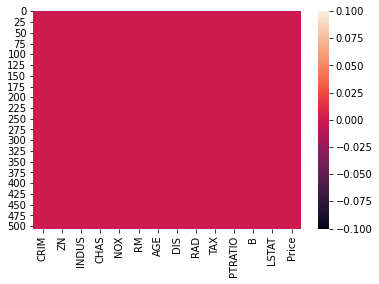

In [70]:
sns.heatmap(data.isnull())

We dont have any missing value

In [16]:
#some statistics about data in the feature columns
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [71]:
# checking the possible correlation
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


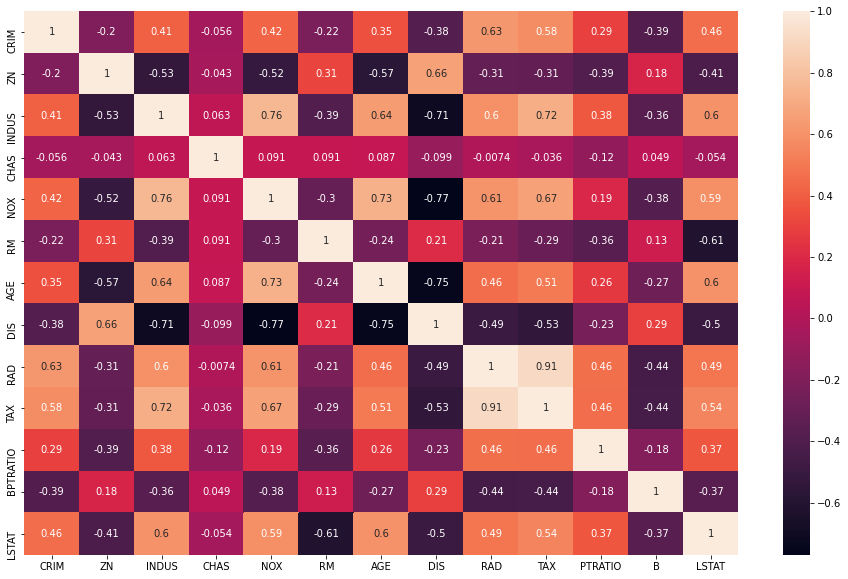

In [21]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

our features are not highly correlated with each other

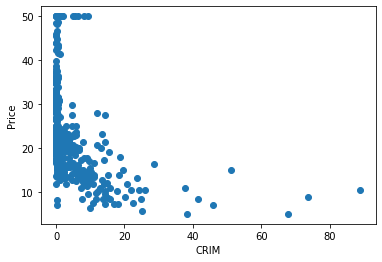

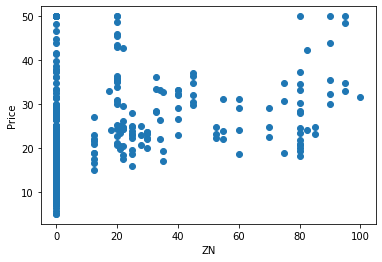

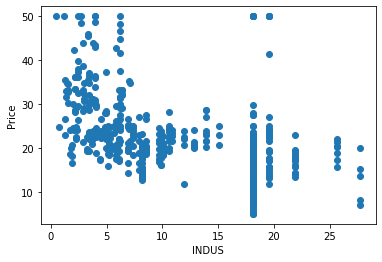

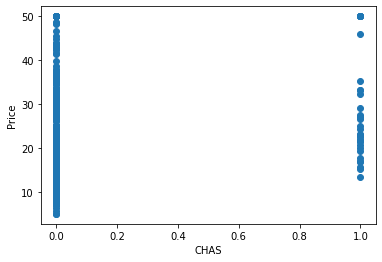

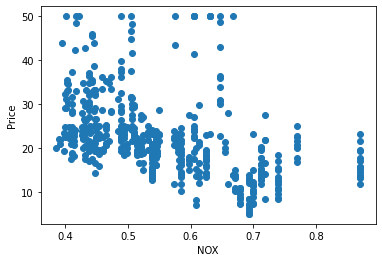

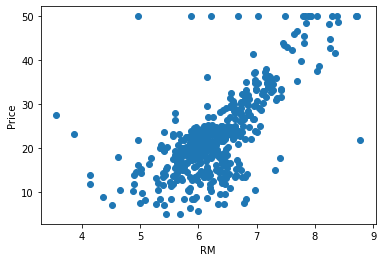

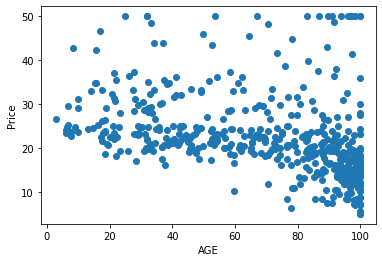

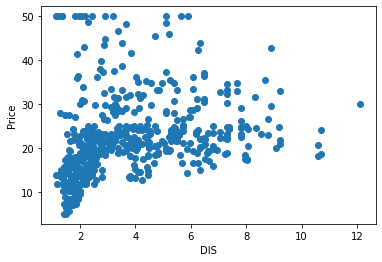

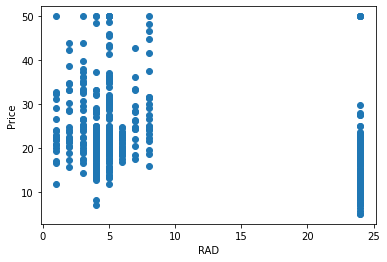

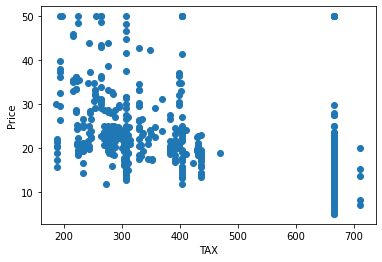

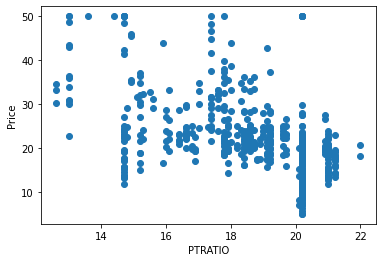

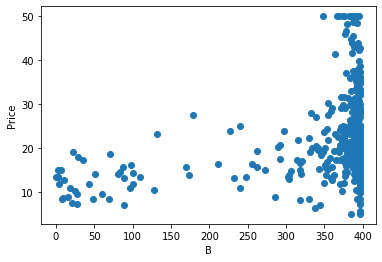

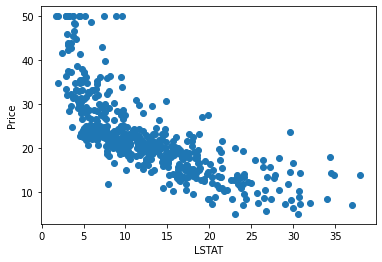

In [22]:
#scatter plots
for column in X.columns:
    plt.scatter(X[column],y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [23]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Interception
print(lr.intercept_)

[29.83642016]


In [30]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [36]:
#coefficients
cdf=pd.DataFrame(lr.coef_, columns=X.columns)
cdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.128323,0.029552,0.048859,2.773503,-16.238829,4.368755,-0.009248,-1.400867,0.257761,-0.009957,-0.923123,0.013185,-0.51764


In [28]:
#prediction 
prediction_1=lr.predict(X_test)

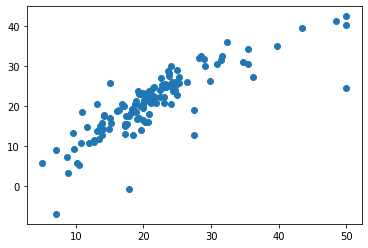

In [38]:
plt.scatter(y_test, prediction_1)

<AxesSubplot:>

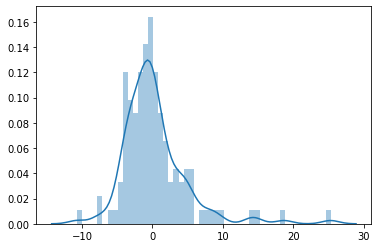

In [42]:
#Residuals
sns.distplot(y_test-prediction_1, bins=50)

In [39]:
from sklearn import metrics

In [40]:
#Evaluation of the model
MAE=metrics.mean_absolute_error (y_test, prediction_1)
MSE=metrics.mean_squared_error (y_test, prediction_1)
RMSE=np.sqrt(metrics.mean_squared_error (y_test, prediction_1))
print ( 'MAE: {}'.format(MAE))
print ( 'MSE: {}'.format(MSE))
print ( 'RMSE: {}'.format(RMSE))

MAE: 3.060939595437034
MSE: 22.098694827098036
RMSE: 4.700924890603766


In [41]:
metrics.explained_variance_score (y_test, prediction_1)

0.6857806457994264

In [54]:
from sklearn.metrics import r2_score
score=r2_score(y_test, prediction_1)
score

0.6844267283527123

In [43]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scalar_feature=StandardScaler()
scaled_data=scalar_feature.fit_transform(X)

In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(scaled_data, y, test_size=0.25, random_state=42)

In [45]:
lr_2=LinearRegression()
lr_2.fit(X_train_2, y_train_2)

LinearRegression()

In [46]:
print(lr_2.intercept_)

[22.45552359]


In [47]:
lr_2.coef_

array([[-1.10268173,  0.6885385 ,  0.33485925,  0.70375686, -1.87985745,
         3.06652733, -0.2600656 , -2.94690286,  2.24217512, -1.6764563 ,
        -1.9965351 ,  1.20257105, -3.69284117]])

In [48]:
#coefficients
cdf_2=pd.DataFrame(lr_2.coef_, columns=X.columns)
cdf_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.102682,0.688539,0.334859,0.703757,-1.879857,3.066527,-0.260066,-2.946903,2.242175,-1.676456,-1.996535,1.202571,-3.692841


In [49]:
prediction_2=lr_2.predict(X_test_2)

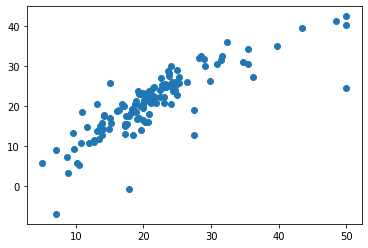

In [50]:
plt.scatter(y_test_2, prediction_2)

<AxesSubplot:>

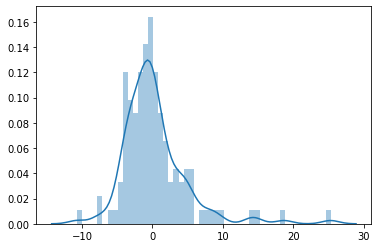

In [51]:
sns.distplot(y_test_2-prediction_2, bins=50)

In [52]:
#Evaluation of the model
MAE=metrics.mean_absolute_error (y_test_2, prediction_2)
MSE=metrics.mean_squared_error (y_test_2, prediction_2)
RMSE=np.sqrt(metrics.mean_squared_error (y_test_2, prediction_2))
print ( 'MAE: {}'.format(MAE))
print ( 'MSE: {}'.format(MSE))
print ( 'RMSE: {}'.format(RMSE))

MAE: 3.0609395954370275
MSE: 22.098694827097887
RMSE: 4.700924890603751


In [53]:
metrics.explained_variance_score (y_test_2, prediction_2)

0.6857806457994283

In [55]:
score_2=r2_score(y_test_2, prediction_2)
score_2

0.6844267283527146